# PRINCIPAL COMPONENT ANALYSIS

The aim of this case study is to carry out principal component analysis for the given wines dataset. First we load the dataset and the libraries into the code. We then carry out data exploration activities like taking a peek at the data, studying descriptive statistics, class distributions and correlation between attributes. We further explore the data and then carry out data visualization using univariate (histogram, density and box and whisker) plots and multivariate (scatter plot matrix and correlation matrix) plots. We then instantiate a model using PCA and then plot the two principal components as a scatter plot. Then the model is clustered using K-Means clustering. The clusters are then compared with the clustering carried out using K-Means algorithm before principal component analysis. The two models are in good agreement. 

In [1]:
# Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import metrics
from patsy import dmatrices
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# LOAD DATASET

In [4]:
df = pd.read_excel("wine.xlsx")

In [5]:
df.shape

(178, 14)

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

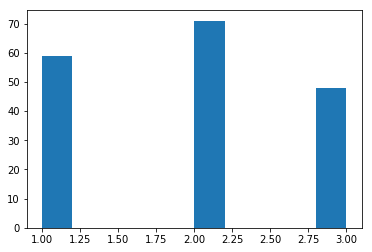

In [6]:
plt.hist(df['Customer_Segment']) # IMBALANCED DATASET

# DATA EXPLORATION

In [7]:
# 1. PEEK AT DATA

In [8]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [9]:
# 2. DIMENSIONS

In [10]:
df.shape

(178, 14)

In [11]:
# 3. DATA TYPES

In [12]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [13]:
# 4. DESCRIPTIVE STATISTICS

In [14]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [15]:
# 5. CLASS DISTRIBUTION

In [16]:
df.groupby("Customer_Segment").size()

Customer_Segment
1    59
2    71
3    48
dtype: int64

In [17]:
# 6. CORRELATION BETWEEN ATTRIBUTES

In [18]:
df.corr(method = "pearson")

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [19]:
# 7. SKEW OF UNIVARIATE DISTRIBUTIONS

In [20]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
Customer_Segment        0.107431
dtype: float64

In [21]:
# 8. DATA INFERENCES

In [22]:
df.groupby('Customer_Segment').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Customer_Segment,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


# DATA VISUALIZATION

In [23]:
# 1. UNIVARIATE PLOTS

In [24]:
# 1.1. HISTOGRAMS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36fc733f60>,
      dtype=object)

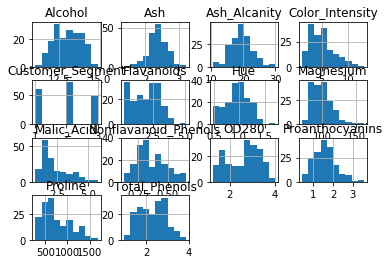

In [25]:
df.hist(layout = (4,4),sharex = False)

In [26]:
# 1.2. DENSITY PLOTS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36fc456eb8>,
      dtype=object)

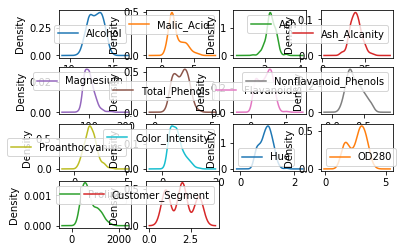

In [27]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False)

In [28]:
# 1.3 BOX AND WHISKER PLOTS

Alcohol                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Malic_Acid               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Ash                      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash_Alcanity             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Magnesium                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total_Phenols           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Flavanoids              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Nonflavanoid_Phenols    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Proanthocyanins            AxesSubplot(0.125,0.321957;0.168478x0.16413)
Color_Intensity         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Hue                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
OD280                   AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Proline                       AxesSubplot(0.125,0.125;0.168478x0.16413)
Customer_Segment           AxesSubplot(0.327174,0.125;0.168478x0

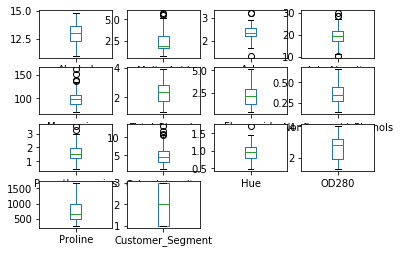

In [29]:
df.plot(kind='box', layout = (4,4),subplots=True, sharex=False, sharey=False)

In [30]:
# 2. MULTIVARIATE PLOTS

In [31]:
# 2.1 CORRELATION MATRIX PLOT

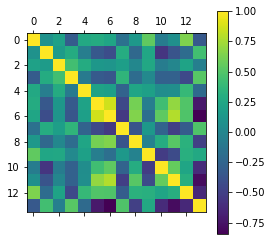

In [32]:
correlations = df.corr()
plt.matshow(correlations)
plt.colorbar()

In [33]:
# 2.2 SCATTER PLOT MATRIX

In [34]:
from pandas.tools.plotting import scatter_matrix

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36f45d3c18>,
      dtype=object)

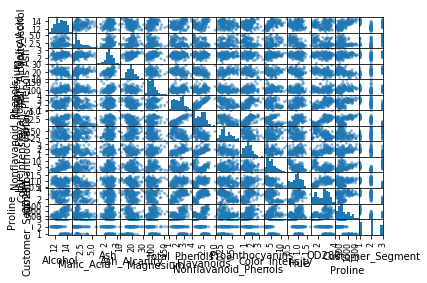

In [35]:
scatter_matrix(df)

In [36]:
# Principal Component analysis 

In [37]:
from sklearn.decomposition import PCA

In [38]:
# feature matrix

In [39]:
X = df.drop('Customer_Segment',axis = 1)

In [40]:
# Instantiate model and fit data

In [41]:
# PCA using SKLEARN
pca = PCA(n_components=2)
# Fit the data and carry out reduction 
x_3d = pca.fit_transform(X)

In [42]:
x_3d

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

In [43]:
# plot Pricipal components

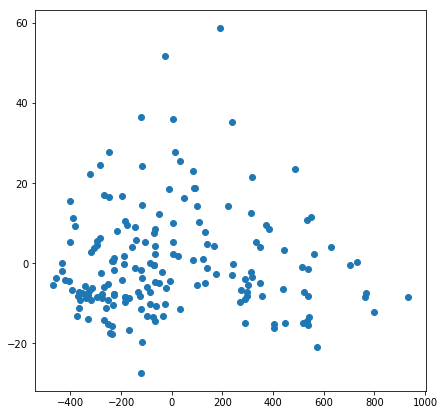

In [44]:
plt.figure(figsize = (7,7))
plt.scatter(x_3d[:,0],x_3d[:,1])
plt.show()

In [45]:
from sklearn.cluster import KMeans
# Kmeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_3d)
X_clustered

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [46]:
# Plot clusters

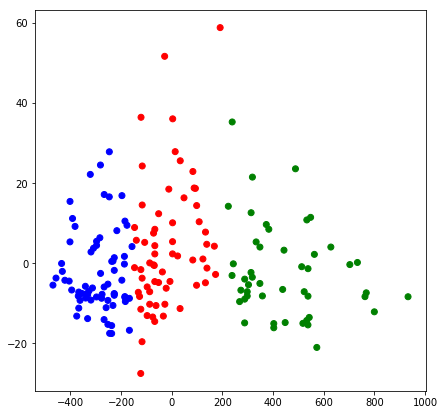

In [47]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.scatter(x_3d[:,0],x_3d[:,1], c= label_color)
plt.show()

In [48]:
X_clustered.shape

(178,)

In [49]:
# Plot clusters before PCA

In [50]:
# Set a 3 KMeans clustering
kmeans1 = KMeans(n_clusters=3, random_state=0)
# Compute cluster centers and predict cluster indices
X_clustered1 = kmeans1.fit_predict(X)
X_clustered1

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [51]:
# SUPERVISED CLASSIFICATION PROBLEM: RANDOM FOREST ALGORITHM, BEFORE PCA

In [52]:
# Rename Columns

In [58]:
df2 = df.rename(columns = {'Alcohol':'AL','Malic_Acid':'MA','Ash_Alcanity':'AA','Magnesium':'MG','Total_Phenols':'TP','Flavanoids':'FL','Nonflavanoid_Phenols':'NP','Proanthocyanins':'PR','Color_Intensity':'CI','Proline':'PRO','Customer_Segment':'CS'})

In [60]:
Y1, X1 = dmatrices('CS ~ AL + MA + Ash + AA + MG + TP + FL  + NP + PR + CI + Hue + OD280 + PRO ', df2, return_type="dataframe")

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size = 0.3,random_state = 0)

In [74]:
# Instantiate models

In [75]:
model1 = RandomForestClassifier(class_weight = "balanced")

In [76]:
# Fit the data

In [77]:
model1.fit(X_train,Y_train) # NUMBER OF TREES = 10

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [78]:
# calculate model scores

In [79]:
model1.score(X_test,Y_test)

0.9814814814814815

In [80]:
# Confusion matrix metrics

In [81]:
predicted1 = model1.predict(X_test)

In [82]:
print(metrics.confusion_matrix(Y_test, predicted1))
print (metrics.classification_report(Y_test, predicted1))

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        19
        2.0       1.00      0.95      0.98        22
        3.0       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        54



In [83]:
# Confusion matrix

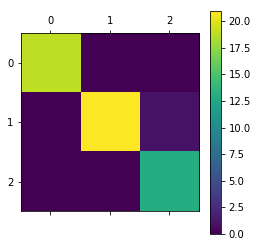

In [84]:
cm = confusion_matrix(Y_test, predicted1)
plt.matshow(cm)
plt.colorbar()

In [85]:
# SUPERVISED CLASSIFICATION PROBLEM: RANDOM FOREST ALGORITHM, AFTER PCA

In [102]:
df3 = pd.DataFrame(x_3d)

In [106]:
df3[2] = df2['CS']

In [111]:
df4 = df3.rename(columns = {0:'PC1',1:'PC2',2:'CS'})

In [112]:
Y2, X2 = dmatrices('CS ~ PC1 + PC2', df4, return_type="dataframe")

In [113]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y2,test_size = 0.3,random_state = 0)

In [114]:
# Instantiate models

In [115]:
model2 = RandomForestClassifier(class_weight = "balanced")

In [116]:
# Fit the data

In [117]:
model2.fit(X_train2,Y_train2) # NUMBER OF TREES = 10

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [118]:
# calculate model scores

In [119]:
model2.score(X_test2,Y_test2)

0.6851851851851852

In [120]:
# Confusion matrix metrics

In [121]:
predicted2 = model2.predict(X_test2)

In [122]:
print(metrics.confusion_matrix(Y_test2, predicted2))
print (metrics.classification_report(Y_test2, predicted2))

[[15  0  4]
 [ 2 16  4]
 [ 3  4  6]]
             precision    recall  f1-score   support

        1.0       0.75      0.79      0.77        19
        2.0       0.80      0.73      0.76        22
        3.0       0.43      0.46      0.44        13

avg / total       0.69      0.69      0.69        54



In [123]:
# Confusion matrix

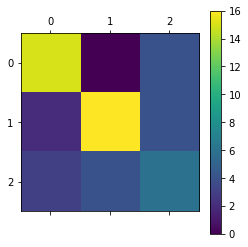

In [125]:
cm = confusion_matrix(Y_test2, predicted2)
plt.matshow(cm)
plt.colorbar()